In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dataset.zip

Archive:  gdrive/MyDrive/dataset.zip
  inflating: data/bike/bike_001.bmp  
  inflating: data/bike/bike_002.bmp  
  inflating: data/bike/bike_003.bmp  
  inflating: data/bike/bike_004.bmp  
  inflating: data/bike/bike_005.bmp  
  inflating: data/bike/bike_006.bmp  
  inflating: data/bike/bike_007.bmp  
  inflating: data/bike/bike_008.bmp  
  inflating: data/bike/bike_009.bmp  
  inflating: data/bike/bike_010.bmp  
  inflating: data/bike/bike_011.bmp  
  inflating: data/bike/bike_012.bmp  
  inflating: data/bike/bike_013.bmp  
  inflating: data/bike/bike_014.bmp  
  inflating: data/bike/bike_015.bmp  
  inflating: data/bike/bike_016.bmp  
  inflating: data/bike/bike_017.bmp  
  inflating: data/bike/bike_018.bmp  
  inflating: data/bike/bike_019.bmp  
  inflating: data/bike/bike_020.bmp  
  inflating: data/bike/bike_021.bmp  
  inflating: data/bike/bike_022.bmp  
  inflating: data/bike/bike_023.bmp  
  inflating: data/bike/bike_024.bmp  
  inflating: data/bike/bike_025.bmp  
  inflating: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os
from skimage.transform import resize
import tensorflow as tf
from skimage.color import rgb2lab,lab2rgb
from skimage.io import imread,imshow,imsave
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential,Model

In [ ]:
TRAIN_ROOT_DIR = "/content/data"

DEST = "/content/training/images"

In [ ]:
if not os.path.exists(DEST):
  os.makedirs(DEST)
  for dir in os.listdir(TRAIN_ROOT_DIR):
    for img in os.listdir(os.path.join(TRAIN_ROOT_DIR,dir)):
      ORG = os.path.join(TRAIN_ROOT_DIR, dir, img)
      try:
        imread(ORG)
        shutil.copy(ORG, DEST)
      except:
        print(f"The image at {ORG} cannot be used")

The image at /content/data/data/human cannot be used
The image at /content/data/data/dogs cannot be used
The image at /content/data/data/horses cannot be used
The image at /content/data/data/flowers cannot be used
The image at /content/data/data/cars cannot be used
The image at /content/data/data/bike cannot be used
The image at /content/data/data/cats cannot be used


In [ ]:
len(os.listdir("/content/training/images"))

1803

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   featurewise_center=True,
                                   rotation_range= 40,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [ ]:
train = train_datagen.flow_from_directory("/content/training",
                                           target_size=(256,256),
                                          batch_size=500,
                                          shuffle=True)

Found 1803 images belonging to 1 classes.


In [ ]:
#to visualise the image
t_img, label = train.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
def plotImage(img_arr, label):
  """
  input: image array
  output: plot the image
  """

  plt.figure(figsize=(5,5))

  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show()

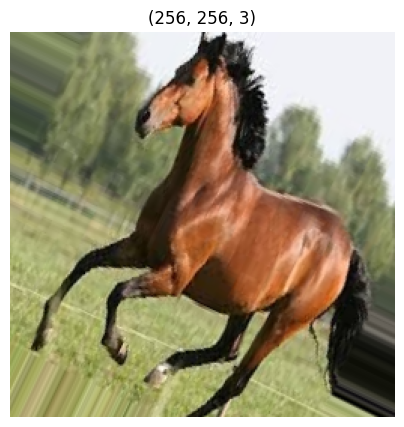

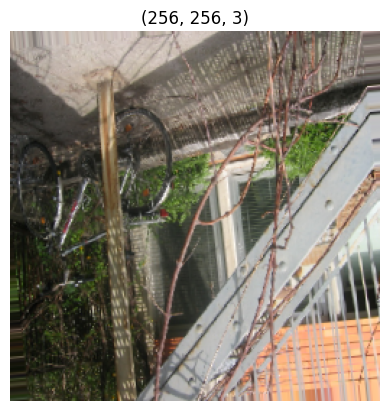

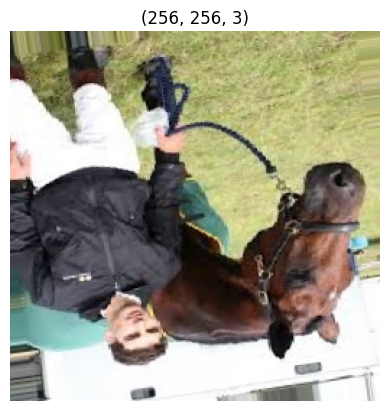

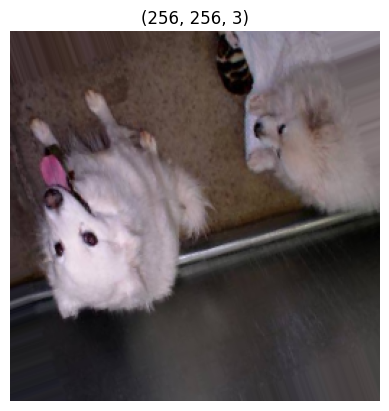

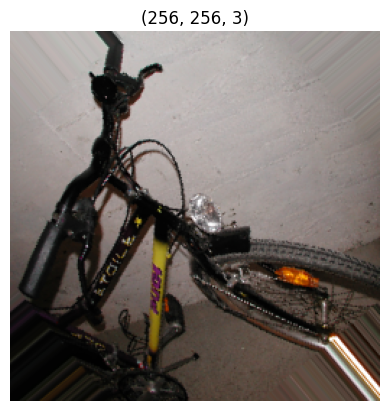

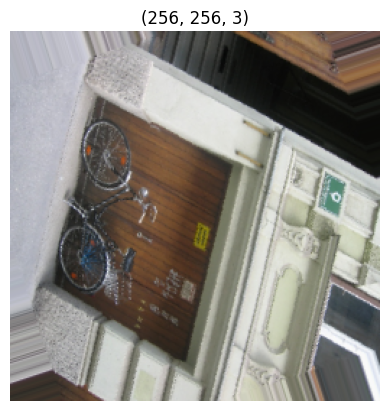

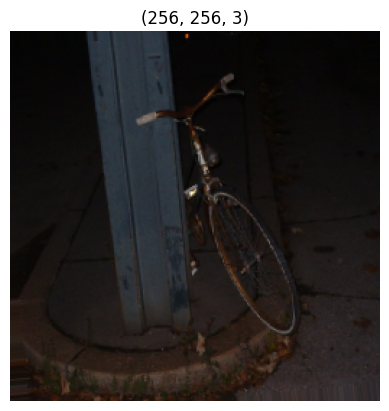

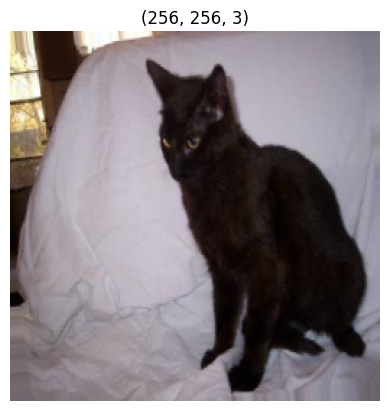

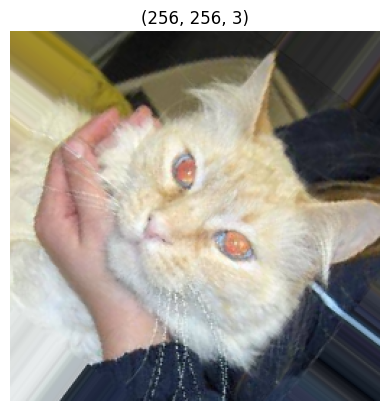

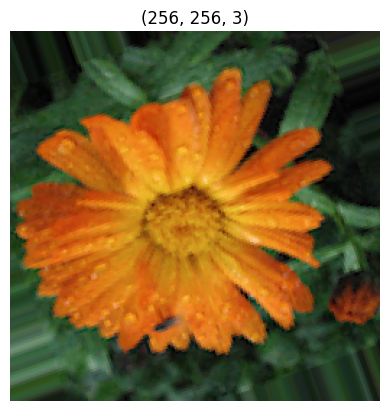

In [ ]:
plotImage(t_img[:10], label[:10])

In [ ]:
t_img.shape

(500, 256, 256, 3)

In [ ]:
label.shape

(500, 1)

In [ ]:
X_data = []
Y_data = []

In [ ]:
for img in t_img:
    try:
        # Check image shape
        if len(img.shape) != 3 or img.shape[2] != 3:
            raise ValueError("Image does not have 3 color channels")

        lab = rgb2lab(img)
        X_data.append(lab[:, :, 0])
        Y_data.append(lab[:, :, 1:] / 128)
    except Exception as e:
        print(f'Error processing image: {str(e)}')

In [ ]:
X_train = np.array(X_data)
X_train = np.expand_dims(X_train, axis= len(X_train.shape))

Y_train = np.array(Y_data)


In [ ]:
X_train.shape,Y_train.shape

((500, 256, 256, 1), (500, 256, 256, 2))

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu', padding='same', strides=2, input_shape = (256,256,1)))
model.add(Conv2D(128,(3,3), activation = 'relu', padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu', padding='same', strides=2))
model.add(Conv2D(256,(3,3), activation = 'relu', padding='same'))
model.add(Conv2D(256,(3,3), activation = 'relu', padding='same', strides=2))
model.add(Conv2D(512,(3,3), activation = 'relu', padding='same'))
model.add(Conv2D(512,(3,3), activation = 'relu', padding='same'))
model.add(Conv2D(256,(3,3), activation = 'relu', padding='same'))

#decoding
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model.add(Conv2D(2,(3,3), activation='tanh', padding='same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train, validation_split=0.1, epochs=5,batch_size=16)

Epoch 1/5
29/29 [==============================] - 607s 21s/step - loss: 0.0129 - accuracy: 0.6987 - val_loss: 0.0122 - val_accuracy: 0.7073
Epoch 2/5
29/29 [==============================] - 610s 21s/step - loss: 0.0127 - accuracy: 0.6989 - val_loss: 0.0122 - val_accuracy: 0.7073
Epoch 3/5
29/29 [==============================] - 608s 21s/step - loss: 0.0126 - accuracy: 0.6989 - val_loss: 0.0122 - val_accuracy: 0.7073
Epoch 4/5
29/29 [==============================] - 601s 21s/step - loss: 0.0126 - accuracy: 0.6989 - val_loss: 0.0123 - val_accuracy: 0.7073
Epoch 5/5
29/29 [==============================] - 602s 21s/step - loss: 0.0126 - accuracy: 0.6989 - val_loss: 0.0122 - val_accuracy: 0.7073


In [ ]:
model.save('colorize_autoencoder.model')

In [ ]:
model = tf.keras.models.load_model('colorize_autoencoder.model',
                                   custom_objects=None,
                                   compile=True)

In [ ]:
img1_color = []

In [ ]:
img1 = img_to_array(load_img("/content/boat1.png"))
img1 = resize(img1,(256,256))
img1_color.append(img1)

In [ ]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

In [ ]:
output1 = model.predict(img1_color)
output1 = output1*128

1/1 [==============================] - 0s 463ms/step


In [ ]:
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]


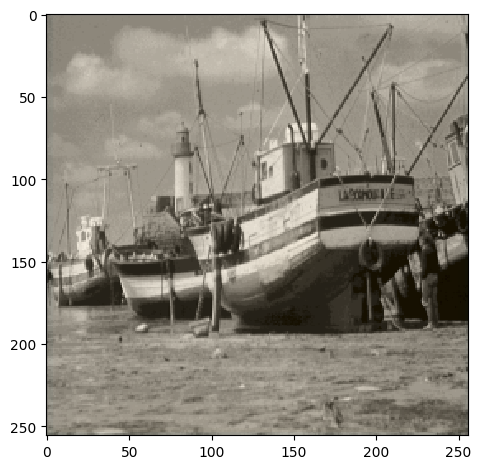

In [ ]:
imshow(lab2rgb(result))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Extract training accuracy from the history object
training_accuracy = history.history['accuracy']  # or 'acc' depending on the version

# Print or use the training accuracy
print("Training Accuracy:", training_accuracy[-1])


Training Accuracy: 0.6988688111305237


In [ ]:
for train_indices, val_indices in kf.split(X_data):
    X_train, X_val = X_data[train_indices], X_data[val_indices]
    y_train, y_val = Y_data[train_indices], Y_data[val_indices]

    y_pred = model.predict(X_val)
    y_pred = np.round(y_pred)

    # Check the unique values in y_val and y_pred
    unique_y_val = np.unique(y_val)
    unique_y_pred = np.unique(y_pred)

    print("Unique values in y_val:", unique_y_val)
    print("Unique values in y_pred:", unique_y_pred)

    # Calculate the test accuracy
    if len(unique_y_val) == 2 and len(unique_y_pred) == 2:
        test_accuracy = accuracy_score(y_val, y_pred)
        test_accuracies.append(test_accuracy)
    else:
        print("Warning: Labels in y_val or y_pred are not binary.")


4/4 [==============================] - 0s 3ms/step
Unique values in y_val: [-0.5389524 -0.5287074 -0.5278004 ...  0.7301339  0.7344353  0.7381104]
Unique values in y_pred: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]
4/4 [==============================] - 0s 6ms/step
Unique values in y_val: [-0.5920957  -0.5860373  -0.5839949  ...  0.734563    0.73484576
  0.736503  ]
Unique values in y_pred: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26